## 导入必要的包

In [1]:
import numpy
import pandas as pd
import tensorflow as tf
import urllib.request
from sklearn import preprocessing
import matplotlib.pyplot as plt
import os
import datetime


tf.__version__

'1.15.2'

## 定义预处理函数

In [2]:
def prepare_data(df_data):
    df = df_data.drop(['name'], axis=1)
    age_mean = df['age'].mean()
    df['age'] = df['age'].fillna(age_mean)
    fare_mean = df['fare'].mean()
    df['fare'] = df['fare'].fillna(fare_mean)
    df['sex'] = df['sex'].map({'female':0, 'male':1}).astype(int)
    df['embarked'] = df['embarked'].fillna('S')
    df['embarked'] = df['embarked'].map({'C':0, 'Q':1, 'S':2}).astype(int)

    ndarray_data = df.values

    features = ndarray_data[:, 1:]
    label = ndarray_data[:, 0]

    minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
    norm_features = minmax_scale.fit_transform(features)

    return norm_features, label

## 读取数据，制作数据集

In [3]:
dataframe = pd.read_excel('./data/titanic3.xls')
selected_cols= ['survived', 'name', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
selected_dataframe = dataframe[selected_cols].copy()
selected_dataframe = selected_dataframe.sample(frac=1)

x_data, y_data = prepare_data(selected_dataframe)

train_size = int(len(x_data) * 0.8)

x_train = x_data[:train_size]
y_train = y_data[:train_size]

x_test = x_data[train_size:]
y_test = y_data[train_size:]

## 搭建模型

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=64,
                          input_dim=7,
                          use_bias=True,
                          kernel_initializer='uniform',
                          bias_initializer='zeros',
                          activation='relu'),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(units=32, activation='sigmoid'),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                512       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 2,625
Trainable params: 2,625
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.003),
              loss='binary_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [7]:
log_dir = os.path.join(
    'logs1.x',
    'train',
    'plugins',
    'profile',
    datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S'))

checkpoint_path = './checkpoint1.x/Titanic_{epoch:02d}-{val_loss:.2f}.ckpt'


callbacks = [tf.keras.callbacks.TensorBoard(log_dir=log_dir,
                         histogram_freq=2),
       tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                         save_weights_only=True,
                         verbose=1,
                         period=5)]

## 开始训练

In [8]:
train_history = model.fit(x=x_train,
              y=y_train,
              validation_split=0.2,
              epochs=100,
              batch_size=40,
              callbacks=callbacks,
              verbose=2)

Train on 837 samples, validate on 210 samples
Epoch 1/100
837/837 - 1s - loss: 0.6804 - acc: 0.6022 - val_loss: 0.6441 - val_acc: 0.6000
Epoch 2/100
837/837 - 0s - loss: 0.6234 - acc: 0.6619 - val_loss: 0.5819 - val_acc: 0.7048
Epoch 3/100
837/837 - 0s - loss: 0.5672 - acc: 0.7312 - val_loss: 0.5260 - val_acc: 0.7762
Epoch 4/100
837/837 - 0s - loss: 0.5147 - acc: 0.7742 - val_loss: 0.5072 - val_acc: 0.7762
Epoch 5/100

Epoch 00005: saving model to ./checkpoint1.x/Titanic_05-0.50.ckpt
837/837 - 1s - loss: 0.4926 - acc: 0.7706 - val_loss: 0.4968 - val_acc: 0.7762
Epoch 6/100
837/837 - 0s - loss: 0.5006 - acc: 0.7682 - val_loss: 0.4946 - val_acc: 0.7810
Epoch 7/100
837/837 - 0s - loss: 0.4795 - acc: 0.8029 - val_loss: 0.4902 - val_acc: 0.7810
Epoch 8/100
837/837 - 0s - loss: 0.4751 - acc: 0.7838 - val_loss: 0.4884 - val_acc: 0.7810
Epoch 9/100
837/837 - 0s - loss: 0.4727 - acc: 0.7861 - val_loss: 0.4943 - val_acc: 0.7905
Epoch 10/100

Epoch 00010: saving model to ./checkpoint1.x/Titanic_1

Epoch 79/100
837/837 - 0s - loss: 0.4398 - acc: 0.8124 - val_loss: 0.4671 - val_acc: 0.7857
Epoch 80/100

Epoch 00080: saving model to ./checkpoint1.x/Titanic_80-0.47.ckpt
837/837 - 0s - loss: 0.4360 - acc: 0.8076 - val_loss: 0.4673 - val_acc: 0.7857
Epoch 81/100
837/837 - 0s - loss: 0.4307 - acc: 0.8005 - val_loss: 0.4703 - val_acc: 0.7905
Epoch 82/100
837/837 - 0s - loss: 0.4401 - acc: 0.7981 - val_loss: 0.4666 - val_acc: 0.8000
Epoch 83/100
837/837 - 0s - loss: 0.4311 - acc: 0.8017 - val_loss: 0.4678 - val_acc: 0.7952
Epoch 84/100
837/837 - 0s - loss: 0.4296 - acc: 0.8172 - val_loss: 0.4673 - val_acc: 0.8000
Epoch 85/100

Epoch 00085: saving model to ./checkpoint1.x/Titanic_85-0.46.ckpt
837/837 - 0s - loss: 0.4384 - acc: 0.8029 - val_loss: 0.4634 - val_acc: 0.7857
Epoch 86/100
837/837 - 0s - loss: 0.4345 - acc: 0.8076 - val_loss: 0.4666 - val_acc: 0.7905
Epoch 87/100
837/837 - 0s - loss: 0.4307 - acc: 0.8053 - val_loss: 0.4650 - val_acc: 0.8000
Epoch 88/100
837/837 - 0s - loss: 0.43

## 训练可视化

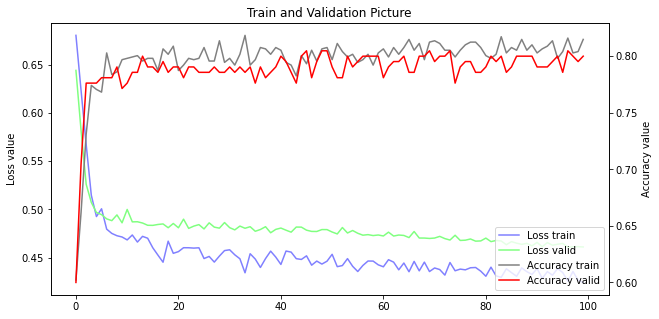

In [9]:
fig = plt.gcf()
fig.set_size_inches(10, 5)
ax1 = fig.add_subplot(111)
ax1.set_title('Train and Validation Picture')
ax1.set_ylabel('Loss value')
line1, = ax1.plot(train_history.history['loss'], color=(0.5, 0.5, 1.0), label='Loss train')
line2, = ax1.plot(train_history.history['val_loss'], color=(0.5, 1.0, 0.5), label='Loss valid')
ax2 = ax1.twinx()
ax2.set_ylabel('Accuracy value')
line3, = ax2.plot(train_history.history['acc'], color=(0.5, 0.5, 0.5), label='Accuracy train')
line4, = ax2.plot(train_history.history['val_acc'], color=(1, 0, 0), label='Accuracy valid')
plt.legend(handles=(line1, line2, line3, line4), loc='best')
plt.show()

## 模型预测

In [10]:
Jack_info = [0, 'Jack', 3, 'male', 23, 1, 0, 5.0000, 'S']
Rose_info = [1, 'Rose', 1, 'female', 20, 1, 0, 100.0000, 'S']

new_passenger_pd = pd.DataFrame([Jack_info, Rose_info], columns=selected_cols)
all_passenger_pd = selected_dataframe.append(new_passenger_pd)

pred = model.predict(prepare_data(all_passenger_pd)[0])

print('Rose survived probability:', pred[-1:][0][0],
      '\nJack survived probability:', pred[-2:][0][0])

Rose survived probability: 0.9762004 
Jack survived probability: 0.10789904


## 加载模型进行预测

In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=64,
                          input_dim=7,
                          use_bias=True,
                          kernel_initializer='uniform',
                          bias_initializer='zeros',
                          activation='relu'),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(units=32, activation='sigmoid'),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(0.003),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [12]:
checkpoint_dir = os.path.dirname(checkpoint_path)
latest = tf.train.latest_checkpoint(checkpoint_dir)
model.load_weights(latest)

In [13]:
loss, acc = model.evaluate(x_test, y_test)

262/262 [==============================] - 0s 244us/sample - loss: 0.4393 - acc: 0.7977
